<span style="font-size: 30px; font-weight: bold;">Import Libraries</span>

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

<span style="font-size: 30px; font-weight: bold;">Dataset Overview</span>

In [159]:
df=pd.read_csv("Youtube.csv")

In [160]:
df.tail()

,COMMENT_ID,AUTHOR,DATE,CLASS,CONTENT_az
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,0,Planetdə yalnız mən olduğum halda bunun necə 2...
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,0,2014-cü ildə buna niyə baxdığımı indi bilmirəm
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,1,Call of duty videoları və Hədəf-100 abunələri ...
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,1,salam uşaqlar zəhmət olmasa mənim android foto...
349,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Benich,2015-06-05T18:05:16,0,İlk milyardlar bunun həqiqətən gözəl olduğunu ...


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CLASS       350 non-null    int64 
 4   CONTENT_az  350 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [162]:
df.describe()

,CLASS
count,350.000000
mean,0.500000
std,0.500716
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [163]:
df.CLASS.value_counts()

CLASS
1    175
0    175
Name: count, dtype: int64

<span style="font-size: 30px; font-weight: bold;">Data Visualization</span>

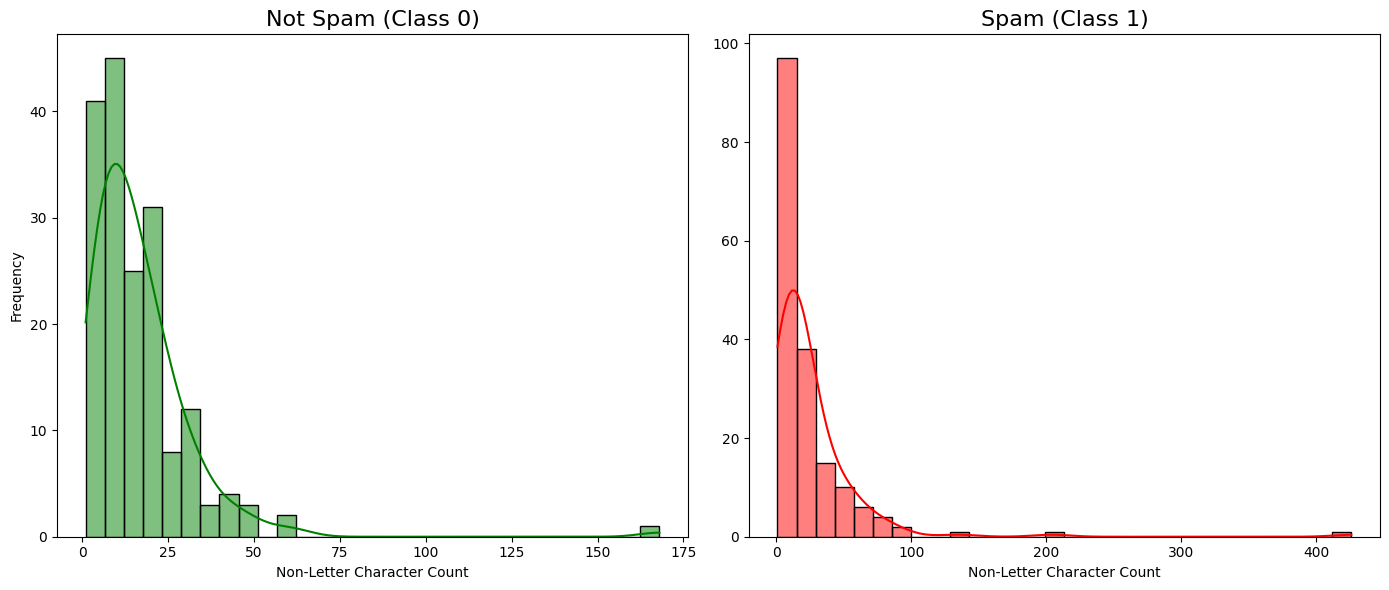

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

df["non_letter_count"] = df["CONTENT_az"].apply(lambda text: sum(not char.isalpha() for char in text))

# Histogram for Not Spam (CLASS=0)
sns.histplot(
    df[df["CLASS"] == 0]["non_letter_count"],
    kde=True, bins=30, color='green',
    ax=axes[0]
)
axes[0].set_title("Not Spam (Class 0)", fontsize=16)
axes[0].set_xlabel("Non-Letter Character Count")
axes[0].set_ylabel("Frequency")

# Histogram for Spam (CLASS=1)
sns.histplot(
    df[df["CLASS"] == 1]["non_letter_count"],
    kde=True, bins=30, color='red',
    ax=axes[1]
)
axes[1].set_title("Spam (Class 1)", fontsize=16)
axes[1].set_xlabel("Non-Letter Character Count")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


<span style="font-size: 30px; font-weight: bold;">Preprocessing Text Data</span>

In [165]:
df.drop(columns=["COMMENT_ID", "AUTHOR", "DATE", "non_letter_count"], inplace=True)

In [166]:
df["CONTENT_az"]=df["CONTENT_az"].apply(lambda text: text.lower())

In [167]:
df.tail()

,CLASS,CONTENT_az
345,0,planetdə yalnız mən olduğum halda bunun necə 2...
346,0,2014-cü ildə buna niyə baxdığımı indi bilmirəm
347,1,call of duty videoları və hədəf-100 abunələri ...
348,1,salam uşaqlar zəhmət olmasa mənim android foto...
349,0,i̇lk milyardlar bunun həqiqətən gözəl olduğunu...


In [168]:
vectorizer=TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df["CONTENT_az"]).toarray()
y=df.CLASS

In [169]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<span style="font-size: 30px; font-weight: bold;">Model Training & Evaluation</span>

In [170]:
model = MultinomialNB(alpha=0.2)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [171]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9929
Test Accuracy: 0.9571


<span style="font-size: 30px; font-weight: bold;">Spam Detection</span>

In [172]:
# Clean and vectorize the sentence
new_text = "Bu videoya baxın və dərhal 1000 manat qazanmaq şansını əldə edin! Linkə klikləyin!"
new_text_cleaned = new_text.lower()
new_text_vectorized = vectorizer.transform([new_text_cleaned]).toarray()

# Make a prediction using the model
prediction = model.predict(new_text_vectorized)

if prediction == 0:
    print("This sentence is NOT SPAM.")
else:
    print("This sentence is SPAM.")

This sentence is SPAM.
